# Лабораторна робота №5
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

In [66]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
#Turn all categories into numbers
data_one_hot = pd.get_dummies(data, dtype=int)

#Create X & y values
X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

#Compile and train the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13466.0137 - mae: 13466.0137 - val_loss: 12417.4531 - val_mae: 12417.4531
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13418.2168 - mae: 13418.2168 - val_loss: 12351.0215 - val_mae: 12351.0215
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.6055 - mae: 13314.6055 - val_loss: 12196.4541 - val_mae: 12196.4541
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13080.0918 - mae: 13080.0918 - val_loss: 11869.8721 - val_mae: 11869.8721
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12630.2734 - mae: 12630.2734 - val_loss: 11285.2148 - val_mae: 11285.2148
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11880.5576 - mae: 11880.5576 - val_loss: 10374.4219 - val_mae: 10374.4209
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 10813.0186 - mae: 10813.0186 - val_loss: 9209

[5340.9833984375, 5340.9833984375]

* Спробуємо змінити гіперпараметри нейронної мережі, щоб досягти найменшого значення функції втрат (mae) і вдосконалити нашу модель
* Спочатку додамо ще один шар і збільшимо у ньому кількість нейронів

9/9 [==============================] - 0s 1ms/step - loss: 2337.9170 - mae: 2337.9170


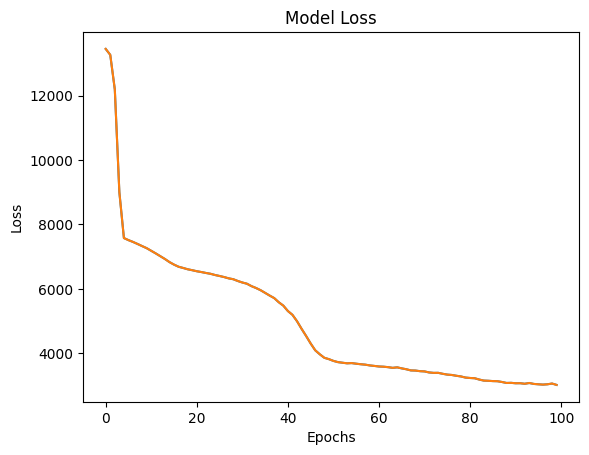

In [67]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
#Turn all categories into numbers
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

#Compile and train the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

Можемо побачити, що значення середньої абсолютної похибки стало краще, а отже використання більшої кількості шарів впливає на вдосконалення нашої моделі

9/9 [==============================] - 0s 2ms/step - loss: 1372.9491 - mae: 1372.9491


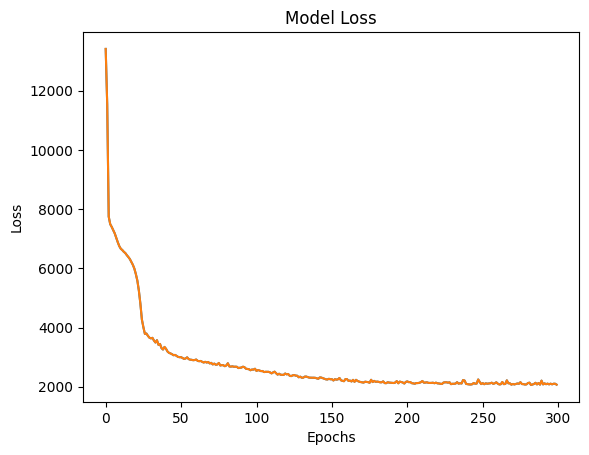

9/9 [==============================] - 0s 2ms/step - loss: 1372.9491 - mae: 1372.9491


(1372.9490966796875, 1372.9490966796875)

In [68]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')
#Turn all categories into numbers
data_one_hot = pd.get_dummies(data, dtype=int)

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

#Compile and train the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=300, verbose=0)
model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

model_loss, model_mae = model.evaluate(X_test, y_test)
model_loss, model_mae

Цього разу ми додали ще один шар і збільшили кількість епох до 300. Бачимо, що значення середньої абсолютної похибки стало ще краще. Відповідно, змінюючи кількість шарів і епох може привести до покращення результатів моделі

9/9 [==============================] - 0s 1ms/step - loss: 1075.4305 - mae: 1075.4305


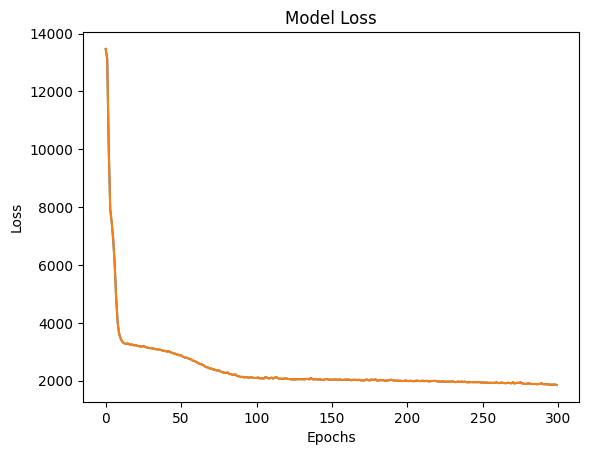


              model          mae
0            model  1372.949097
1  insurance_model  1075.430542


In [69]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('medical_insurance.csv')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
#Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #one hot encoding
)

X = data.drop("charges", axis=1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

ct.fit(X_train)
#Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

#Build the insurance model
insurance_model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_normal.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

# Compile the insurance model
insurance_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#Fit the insurance model
insurance_history = insurance_model.fit(X_train_normal, y_train, epochs=300, verbose=0) 

# Evaulate insurance model
insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test_normal, y_test)

plt.plot(insurance_history.history['loss'], label='Train Loss')
plt.plot(insurance_history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

model_results = [["model", model_mae],
                 ["insurance_model", insurance_model_mae]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
print("\n", all_results)

* Тут ми спробуємо виконати попередню обробку даних (нормалізація та стандартизація) за рахунок масштабування всіх значень із початкового діапазону до вигляду між 0 і 1
* Ми перетворимо категоріальні ознаки у числові і також нормалізуємо їх. Для цього використаємо make_column_transformer з класів Scikit-Learn. Після нормалізації даних (і якраз через неї) у нас вийшла різниця у розмірі даних, які ми подаємо. І щоб вирішити цю різницю, ми трансформуємо наші дані. Далі все те саме і йде побудова мережі і моделі
* У кінці порівняємо результати попередньої моделі (зі змінами гіперпараметрів і без попередньої обробки даних) із тією, що пройшла попередню обробку даних. Бачимо, що нормалізація даних призводить до ~20% меншої помилки при використанні тієї самої моделі, ніж відсутність нормалізації даних (і це є однією з переваг нормалізації)